# Keras_OCR Inital State
In this notebook, we'll test the accuracy of the default detector and recognizer of Keras OCR on ISIS ionograms.

In [1]:
import pandas as pd
import os
import time
import keras_ocr
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import string
from random import randrange

In [2]:
# Function to draw a random image
def draw_random_image(dataDir):
    directory_list = os.listdir(dataDir)
    directory = directory_list[randrange(len(directory_list))]
    subdirectory_list = os.listdir(dataDir + directory + '/')
    subdirectory = subdirectory_list[randrange(len(subdirectory_list))]
    image_list = os.listdir(dataDir + directory + '/'+subdirectory+'/')
    image = image_list[randrange(len(image_list))]    
    return directory, subdirectory, image

In [3]:
# Draw 3 random images
dataDir = 'L:/DATA/ISIS/raw_upload_20230421/'
img_list=[]
for i in range(3):
    directory, subdirectory, image = draw_random_image(dataDir)
    img_list.append(dataDir+directory+'/'+subdirectory+'/'+image)

In [4]:
# Default recognizer and detector
pipeline = keras_ocr.pipeline.Pipeline()

Looking for C:\Users\mfortier\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\mfortier\.keras-ocr\crnn_kurapan.h5


In [5]:
# Import the images
images = [keras_ocr.tools.read(img) for img in img_list]

In [6]:
# Generate text predictions from the images
prediction_groups = pipeline.recognize(images)

1/1 [==============================] - 3s 3s/step


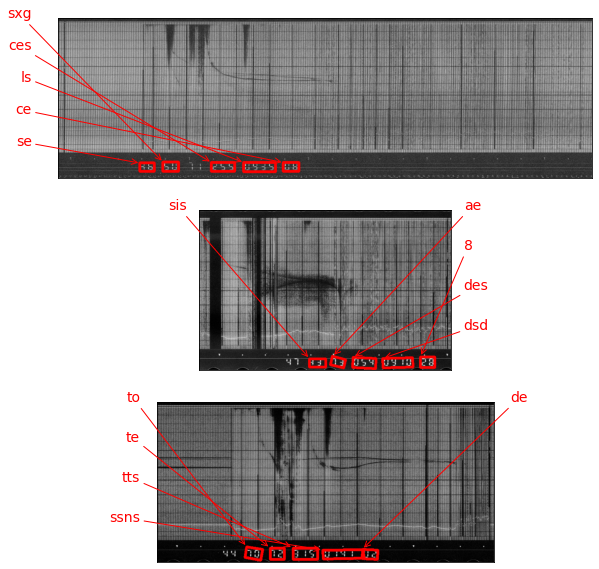

In [7]:
# Plot the text predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(15, 10))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

Clearly the default recognizer is not adequate, as it can sometimes classify fuzzy numbers as letters. The detector also have trouble detecting the presence of text. Let's try to define our alphabet as only numbers

In [8]:
# Define our alphabet and reload the detector and recognizer
detector = keras_ocr.detection.Detector()
alphabet = string.digits
recognizer = keras_ocr.recognition.Recognizer(alphabet=alphabet,weights='kurapan')
recognizer.compile()
pipeline = keras_ocr.pipeline.Pipeline(detector=detector, recognizer=recognizer)

Looking for C:\Users\mfortier\.keras-ocr\craft_mlt_25k.h5
Provided alphabet does not match pretrained alphabet. Using backbone weights only.
Looking for C:\Users\mfortier\.keras-ocr\crnn_kurapan_notop.h5


In [9]:
# Generate text predictions from the images
prediction_groups = pipeline.recognize(images)

1/1 [==============================] - 2s 2s/step


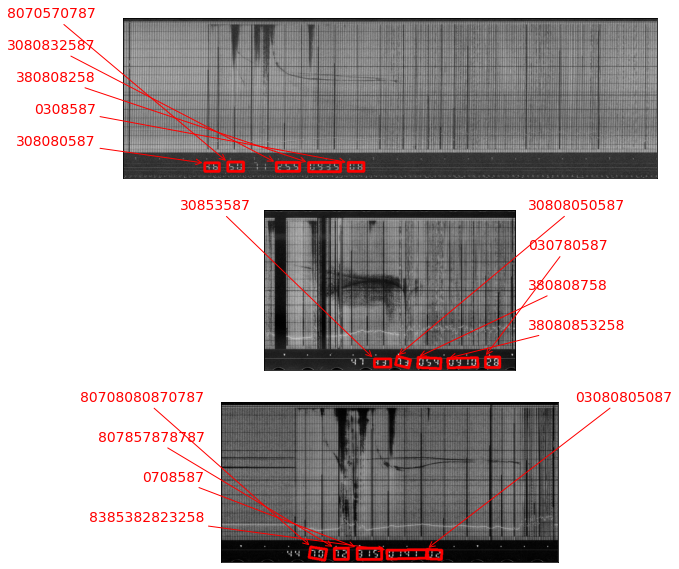

In [10]:
# Plot the text predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(15, 10))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

It's still chaos and very inaccurate.